In [11]:
%matplotlib inline
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
DATA_DIR = Path('data', 'financial', 'raw')
TICKERS = ['AMZN', 'FB', 'GOOG', 'MSFT']

In [57]:
xlist = []
for ticker in TICKERS:
    fname =  str(DATA_DIR.joinpath(ticker + '.csv'))
    xf = pd.read_csv(fname, parse_dates=['Date'])
    xf['company'] = ticker
    xf = xf.sort_values('Date', ascending=True)
    # http://pandas.pydata.org/pandas-docs/stable/indexing.html#the-in-and-not-in-operators    
    xf = xf[xf['Date'].dt.year.isin([2014, 2015, 2016])]    
    
    # make a new dataframe, trimmed down
    xf = xf[['company', 'Date', 'Adj Close']]
    xf['pct_change'] = xf['Adj Close'].pct_change() * 100
    xlist.append(xf) # a list of dataframes, nothing more

In [59]:
# make one big frame
df = pd.concat(xlist, ignore_index=True)

In [60]:
df.head()

,company,Date,Adj Close,pct_change
0,AMZN,2014-01-02,397.970001,NaN
1,AMZN,2014-01-03,396.440002,-0.384451
2,AMZN,2014-01-06,393.630005,-0.708808
3,AMZN,2014-01-07,398.029999,1.117799
4,AMZN,2014-01-08,401.920013,0.977317


# Matplotlib all in one

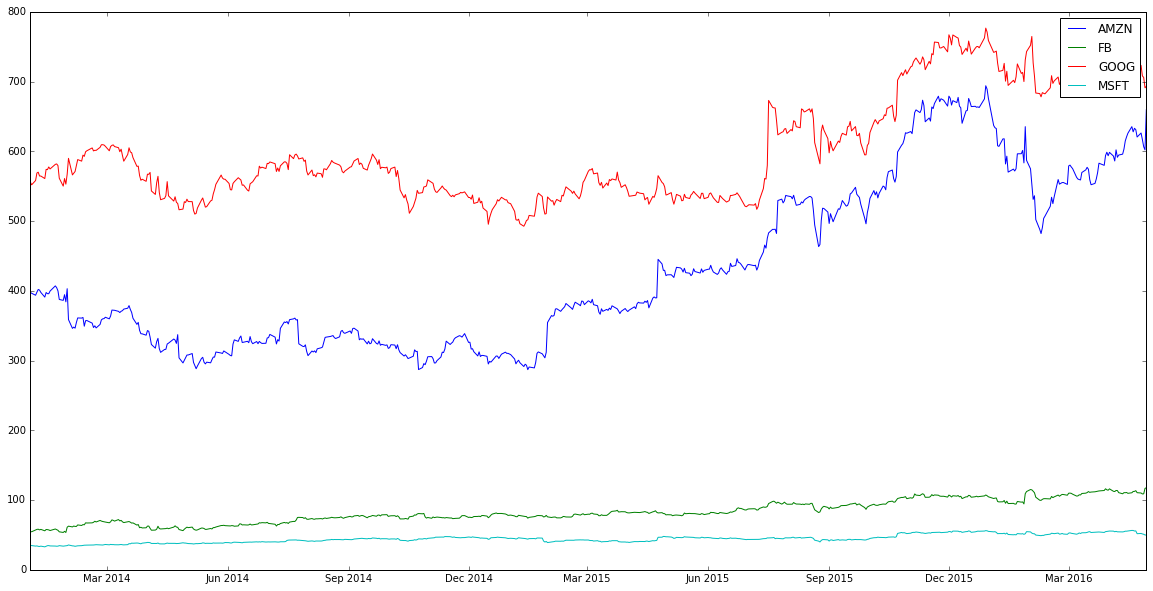

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))
for ticker in TICKERS:
    xf = df[df['company'] == ticker]
    ax.plot(xf['Date'], xf['Adj Close'])
    
ax.legend(TICKERS)

# Matplotlib subplots

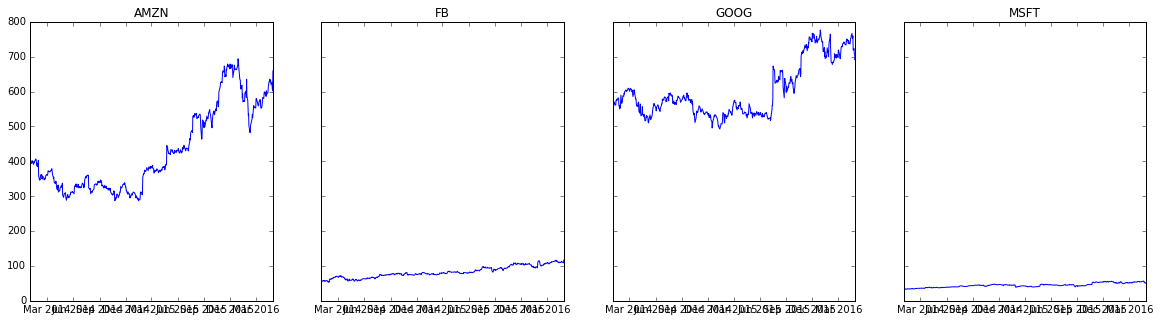

In [63]:
nrow = len(TICKERS)
fig, axlist = plt.subplots(1, nrow, sharey=True, figsize=(20, 5))
for n in range(nrow):
    ticker = TICKERS[n]
    xf = df[df['company'] == ticker]
    ax = axlist[n]
    ax.plot(xf['Date'], xf['Adj Close'])
    ax.set_title(ticker)

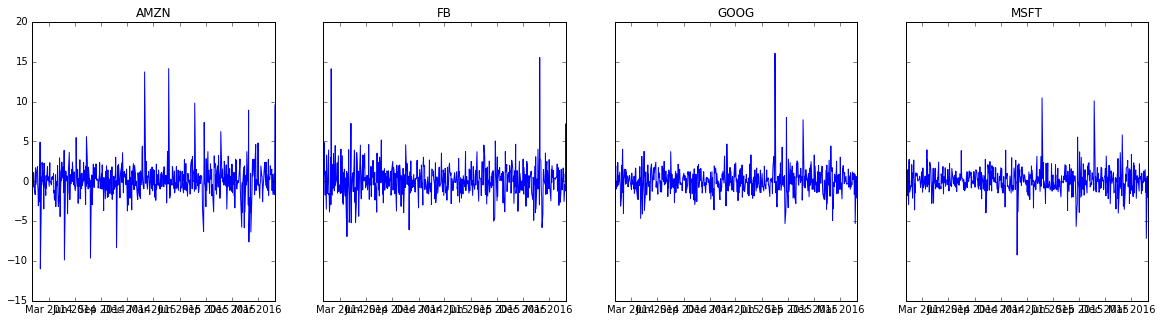

In [73]:
nrow = len(TICKERS)
fig, axlist = plt.subplots(1, nrow, sharey=True, figsize=(20, 5))
for n in range(nrow):
    ticker = TICKERS[n]
    xf = df[df['company'] == ticker]
    ax = axlist[n]
    ax.plot(xf['Date'], xf['pct_change'])
    ax.set_title(ticker)